# Notebook: Plot-Query-05
## Auteur: Noah Paulmier
## Date: 21 Mars 2025
## Formation: BUT Info, SAE204
### Objectif
#### Afficher les visualisations de la requête:
```
    Nombre de clients par départements
```

#### Import des composants et des données pour la connexion à la base de données

In [1]:
import cx_Oracle
import db_config

#### Connexion à la BD SAE204

In [2]:
vconnect = cx_Oracle.connect(db_config.user, db_config.pwd, db_config.dsn)

#### Requête
Nombre de réservations par chambre de l'hotel (id_hotel = 1) <br>
On introduit une variable de liaison, nommée ```v_id_hotel```, dans le code SQL de la requête

In [3]:
query = """
        SELECT SUBSTR(A.CODE_ADRESSE, 1, 2) AS "Département", COUNT(C.ID_CLIENT) AS "Nbre de clients"
        FROM ADRESSE A
        JOIN CLIENT C ON A.ID_ADRESSE = C.ADRESSE
        JOIN RESERVATION R ON C.ID_CLIENT = R.CLIENT
        JOIN RESERVATION_CHAMBRE RC ON R.ID_RESA = RC.RESERVATION
        JOIN CHAMBRE CH ON RC.CHAMBRE =  CH.ID_CHAMBRE
        WHERE SUBSTR(A.CODE_ADRESSE, 1, 2) = :v_id_departement AND
              A.PAYS = 1 AND
              CH.HOTEL = :v_id_hotel 
        GROUP BY SUBSTR(A.CODE_ADRESSE, 1, 2)
        ORDER BY SUBSTR(A.CODE_ADRESSE, 1, 2)
        """

#### Import de la librairie ```matplotlib``` et l'interface ```pyplot```
Pour plus d'information: https://matplotlib.org/

In [4]:
!pip install matplotlib
import matplotlib.pyplot as plt
import random

     |████████████████████████████████| 8.3 MB 2.6 MB/s            
     |████████████████████████████████| 4.5 MB 79.6 MB/s            
     |████████████████████████████████| 19.5 MB 71.0 MB/s            
     |████████████████████████████████| 321 kB 99.1 MB/s            
     |████████████████████████████████| 4.6 MB 74.6 MB/s            
     |████████████████████████████████| 1.6 MB 79.8 MB/s            


/opt/conda/lib/python3.9/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [6]:
x_label = "Départements"
y_label = "Nombres de clients"
x_data = []
y_data = []

def execute_query(id_hotel, departement):
    vcursor = cx_Oracle.Cursor(vconnect)
    vcursor.execute(query, v_id_hotel = id_hotel, v_id_departement = str(department))
    x_data.clear()
    y_data.clear()
    for row in vcursor.fetchall():
        x_data.append(row[0])
        y_data.append(row[1])

def init_plot():
    plt.figure()
    plt.rcParams["figure.figsize"] = [15, 4]
    plt.grid(True)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.suptitle('Nombre de réservations clients par départements Français de l\'hotel %s' %(id_hotel))

def add_data_plot(departement, type_chart='plot'):
    plt.grid(True)
    if len(y_data) > 0:
        plot_label = '%s000' %(departement)
        color = (random.random(), random.random(), random.random())
        if (type_chart == 'plot'):
            plt.plot(x_data, y_data, color=color, label = plot_label)
        elif (type_chart == 'bar'):
            plt.bar(x_data, y_data, color=color, label = plot_label)

def show_plot():
    plt.legend(loc='upper right')
    plt.show()

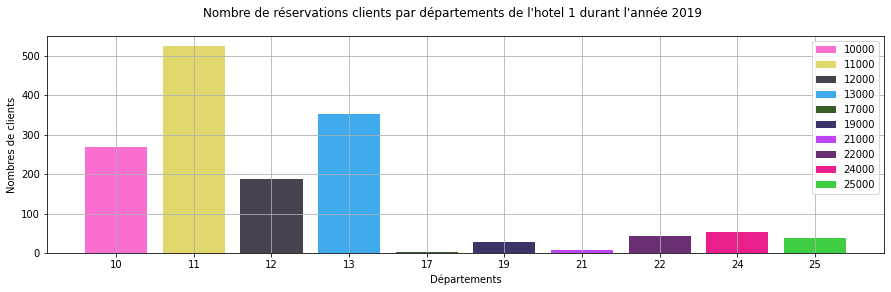

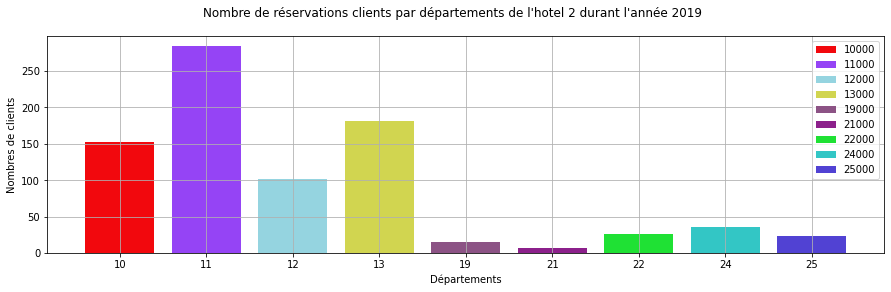

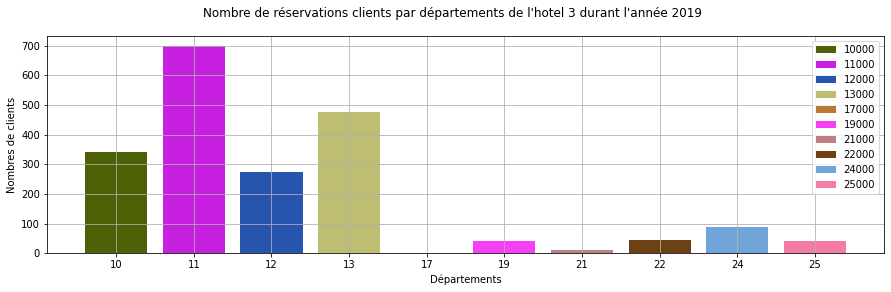

In [8]:
for id_hotel in [1, 2, 3]:
    init_plot()
    for department in range(1,97):
        execute_query(id_hotel, department)
        add_data_plot(department, 'bar')
    show_plot()

In [80]:
vconnect.close()